<a href="https://colab.research.google.com/github/Ahtesham-Ibne-Mostafa/Computer_Vision_Image_Processing/blob/main/CSE428_Task_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
%matplotlib inline
from numpy.fft import fft,fft2, fftshift, fftfreq, ifft, ifftshift,ifft2
pi = np.pi
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm





In [8]:
import cv2
from skimage import io
# Loading grayscale image
img = io.imread("/content/ChatGPT Image Jul 22, 2025, 04_01_56 PM-modified.png", as_gray=True)

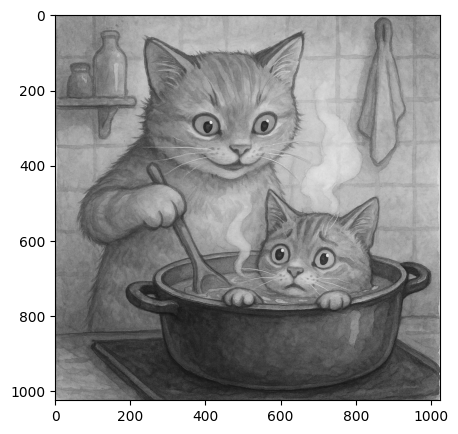

In [10]:
%matplotlib inline
plt.figure(figsize=(5,5))
plt.imshow(np.log(1+np.abs(img)), cmap="gray")

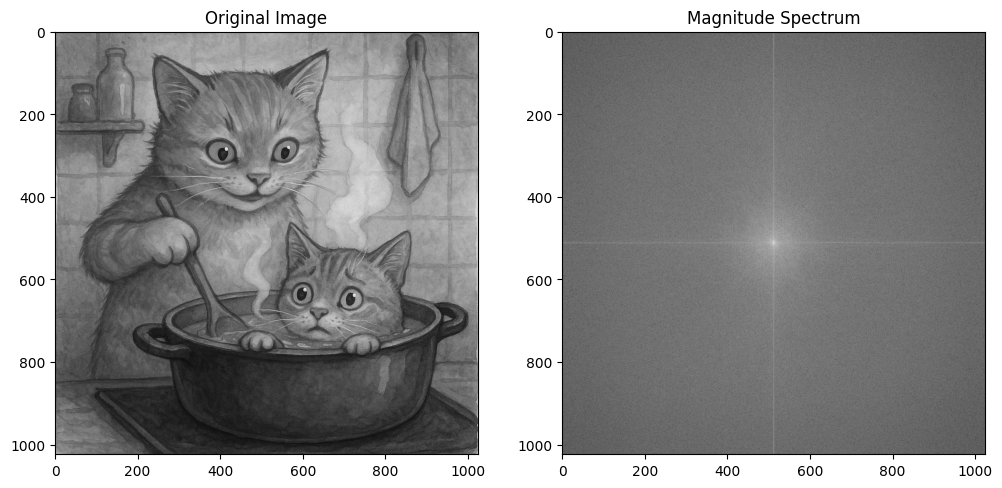

In [15]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Load the image in grayscale
image = cv2.imread('/content/ChatGPT Image Jul 22, 2025, 04_01_56 PM-modified.png', cv2.IMREAD_GRAYSCALE)

# Compute the DFT
dft = np.fft.fft2(image) # Compute the 2D Fourier Transform
dft_shift = np.fft.fftshift(dft) # Shift zero frequency to center

# Compute magnitude spectrum
magnitude_spectrum = 20 * np.log(np.abs(dft_shift) + 1) # Adding 1 to avoid log(0)

# Plot the original image, magnitude spectrum, and reconstructed image
plt.figure(figsize=(12, 8))
plt.subplot(121), plt.imshow(image, cmap='gray'), plt.title('Original Image')
plt.subplot(122), plt.imshow(magnitude_spectrum, cmap='gray'), plt.title('Magnitude Spectrum')
plt.show()

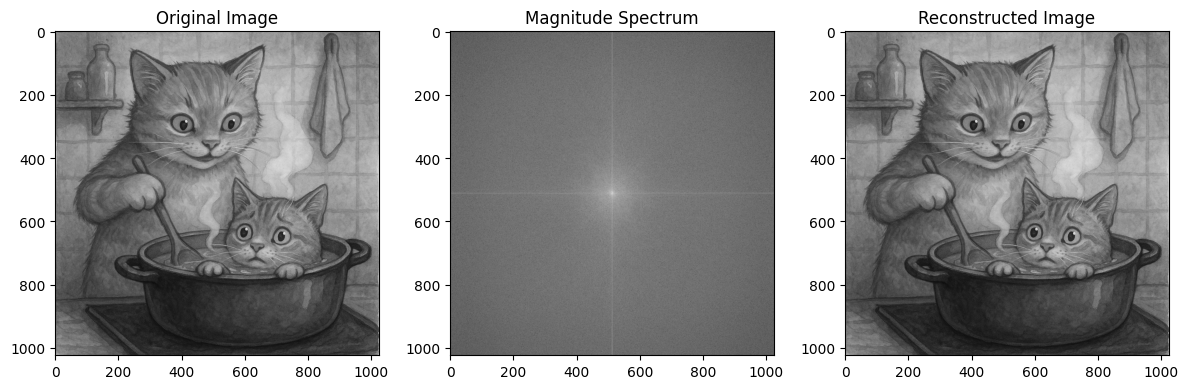

In [17]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Compute the IDFT
idft_shift = np.fft.ifftshift(dft_shift) # Shift zero frequency back to original
idft = np.fft.ifft2(idft_shift) # Compute the Inverse Fourier Transform
idft_image = np.abs(idft) # Take the magnitude to get the image

# Plot the original image, magnitude spectrum, and reconstructed image
plt.figure(figsize=(12, 8))
plt.subplot(131), plt.imshow(image, cmap='gray'), plt.title('Original Image')
plt.subplot(132), plt.imshow(magnitude_spectrum, cmap='gray'), plt.title('Magnitude Spectrum')
plt.subplot(133), plt.imshow(idft_image, cmap='gray'), plt.title('Reconstructed Image')
plt.tight_layout()
plt.show()

In [14]:
def perform_fft2(x, M, N):
    X = fft2(x)
    X = fftshift(X)
    X= X/(N*M)


    u = fftshift(fftfreq(M))
    v = fftshift(fftfreq(N))

    u, v = np.meshgrid(u, v)

    return X, u, v

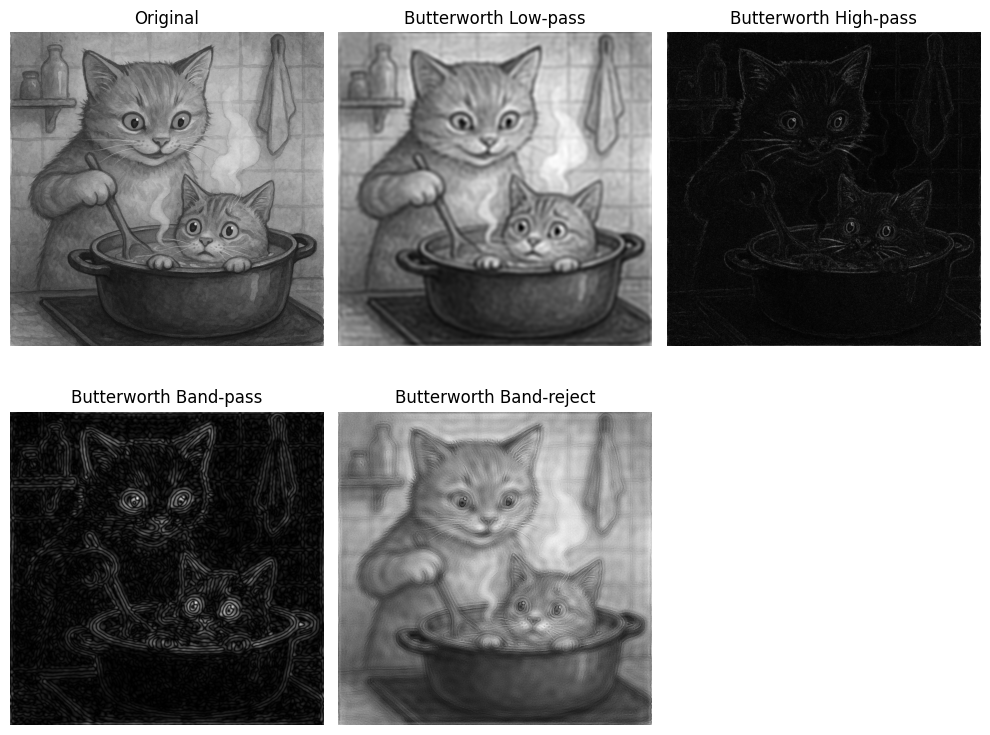

In [19]:


rows, cols = img.shape
X,u,v= perform_fft2(img,rows,cols)

# Radial frequency grid
D = np.sqrt(u**2 + v**2)

# === LOW PASS FILTER ===
f_thres = 0.05
N_ord = 8
H_lp = 1 / np.sqrt(1 + (D / f_thres)**(2 * N_ord))

# === HIGH PASS FILTER ===
f_thres = 0.07
N_ord = 2
H_hp = 1 - (1 / np.sqrt(1 + (D / f_thres)**(2 * N_ord)))

# === BAND PASS FILTER ===
f_thres_low = 0.03
f_thres_high = 0.08
N_ord = 20
H_lp1 = 1 / np.sqrt(1 + (D / f_thres_high)**(2 * N_ord))
H_lp2 = 1 / np.sqrt(1 + (D / f_thres_low)**(2 * N_ord))
H_bp = H_lp1 - H_lp2

# === BAND STOP FILTER ===
H_br = 1 - H_bp

# Apply filters
def apply_filter(H, X):
    filtered = X * H
    return np.abs(np.fft.ifft2(np.fft.ifftshift(filtered)))

# Filtered results
img_lp = apply_filter(H_lp, X)
img_hp = apply_filter(H_hp, X)
img_bp = apply_filter(H_bp, X)
img_br = apply_filter(H_br, X)

# Plotting
plt.figure(figsize=(10, 8))
plt.subplot(2, 3, 1)
plt.imshow(img, cmap='gray')
plt.title("Original")
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(img_lp, cmap='gray')
plt.title("Butterworth Low-pass")
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(img_hp, cmap='gray')
plt.title("Butterworth High-pass")
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(img_bp, cmap='gray')
plt.title("Butterworth Band-pass")
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(img_br, cmap='gray')
plt.title("Butterworth Band-reject")
plt.axis('off')

plt.tight_layout()
plt.show()
